# **MAJOR PROJECT** -  **SOIL FERTILITY PREDICTION**

----


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pickle

In [4]:
# reading data from excel sheet
from google.colab import drive
drive.mount('/content/drive')
soil_data = pd.read_excel(r'/content/drive/MyDrive/soil_data.xlsx',header=None)

# Viewing first few rows of dataset
soil_data.head(10)

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Metadata - Soils Collection and Lab (Kuo) Anal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sample,DIR.,INT/EXT,Sub- Sample #,Date,Time,Latitude,Longitude,Slope,Aspect,...,SO4-S (ppm),B (ppm),Organic Matter %,pH,Zn (ppm),Cu (ppm),Fe (ppm),Ca (meq/100g),Mg (meq/100g),Na (meq/100g)
2,1,NW,INT,1,2012-06-04 00:00:00,13:50:00,N25.77485,W171.73539,2,92,...,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
3,2,NW,INT,2,2012-06-04 00:00:00,14:43:00,N25.77774,W171.73643,1,167,...,7,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07
4,3,NW,INT,3,2012-06-04 00:00:00,14:10:00,N25.77628,W171.73480,5,75,...,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
5,4,NW,INT,4,2012-06-06 00:00:00,10:28:00,N25.76979,W171.73617,3,70,...,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.1
6,5,NW,EXT,1,2012-06-08 00:00:00,09:30:00,N25.77313,W171.74076,6,299,...,6,0.25,0.1,8.8,0.3,0.1,1,4.7,0.5,0.1
7,6,NW,EXT,2,2012-06-08 00:00:00,10:00:00,N25.77141,W171.74171,2,311,...,6,0.24,0.22,8.3,0.9,0.1,1,4.9,0.5,0.09
8,7,NW,EXT,3,2012-06-11 00:00:00,10:30:00,N25.78053,W171.73324,0,0,...,5,0.2,0.08,8.7,0.3,0.1,1,5.7,0.4,0.08
9,8,NW,EXT,4,2012-06-11 00:00:00,10:00:00,N25.77803,W171.73720,3,280,...,8,0.18,0.41,8.3,0.8,0.1,1,5.6,0.4,0.07


# Exploratory Data Analysis

In [5]:
# removing unnecessary columns and rows that do not contains data
soil_data = soil_data.drop(np.arange(410,422),axis=0)
soil_data = soil_data.drop([0,1],axis=0)
soil_data = soil_data.drop(np.arange(0,10),axis=1)

#renaming column names and units of each attributes
column_names = ['Vegetation Cover','NO3','NH4','P','K','SO4',
                'B','Organic Matter','pH','Zn','Cu','Fe','Ca','Mg','Na']
attribute_units = ['%age','ppm','ppm','ppm','ppm','ppm','ppm',
                "%age",'pH','ppm','ppm','ppm','meq/100g','meq/100g','meq/100g']


#assuring length of column and attribute_units is same
assert(len(attribute_units) == len(column_names))


#creating new dataframe with column name
soil_data = pd.DataFrame(soil_data.values,columns=column_names)

#viewing final data frame
soil_data.head()

,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,100,23,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
1,95,6,0.75,58,10,7,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07
2,98,7.25,1,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
3,100,21,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.1
4,15,1.75,0.5,17,4,6,0.25,0.1,8.8,0.3,0.1,1,4.7,0.5,0.1


In [6]:
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Vegetation Cover  395 non-null    object
 1   NO3               394 non-null    object
 2   NH4               405 non-null    object
 3   P                 402 non-null    object
 4   K                 403 non-null    object
 5   SO4               407 non-null    object
 6   B                 405 non-null    object
 7   Organic Matter    406 non-null    object
 8   pH                405 non-null    object
 9   Zn                403 non-null    object
 10  Cu                407 non-null    object
 11  Fe                407 non-null    object
 12  Ca                406 non-null    object
 13  Mg                408 non-null    object
 14  Na                402 non-null    object
dtypes: object(15)
memory usage: 47.9+ KB


In [7]:
soil_data.describe()

,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
count,395,394.00,405.00,402,403,407,405.0,406.00,405.0,403.0,407.0,407,406.0,408.0,402.00
unique,22,77.00,26.00,70,39,30,60.0,75.00,15.0,30.0,9.0,4,33.0,17.0,33.00
top,35,3.75,0.75,41,13,6,0.2,0.54,8.0,0.4,0.1,1,5.6,0.4,0.04
freq,41,18.00,68.00,18,30,54,22.0,14.00,64.0,41.0,254.0,285,36.0,112.0,43.00


In [42]:
numerical_cols= soil_data.select_dtypes(['int64', 'float64']).columns
numerical_cols[:-1]

Index(['Vegetation Cover', 'NO3', 'NH4', 'P', 'K', 'SO4', 'B',
       'Organic Matter', 'pH', 'Zn', 'Cu', 'Fe', 'Ca', 'Mg'],
      dtype='object')

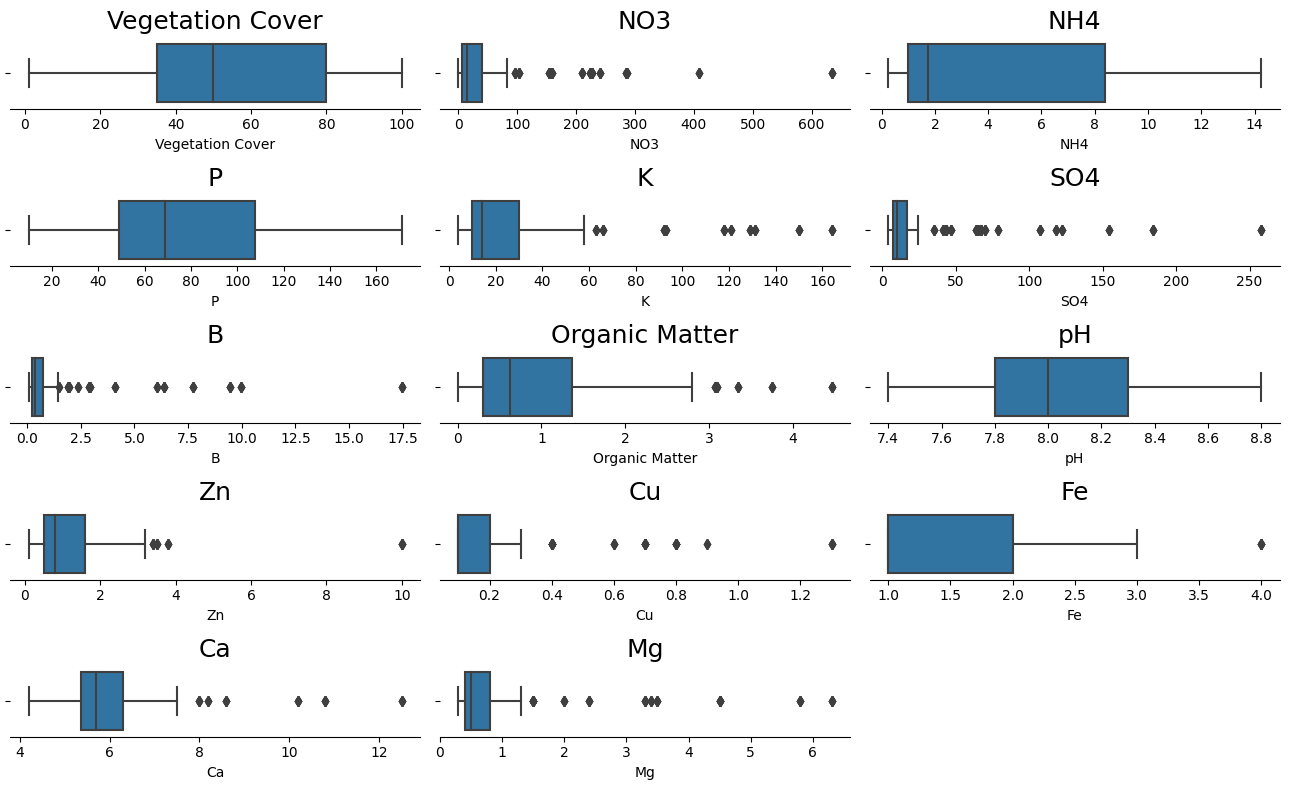

In [43]:
titles = numerical_cols[:-1].tolist()
plt.figure(figsize=(13,8))
for i, variable in enumerate(numerical_cols[:-1]):
    plt.subplot(5,3,i+1)
    sb.boxplot(x=soil_data[variable],data=soil_data)
    sb.despine(top=True,right=True,left=True)
    plt.tight_layout()
    plt.title(titles[i],size = 18)

In [10]:
soil_data.isna().sum()

Vegetation Cover    13
NO3                 14
NH4                  3
P                    6
K                    5
SO4                  1
B                    3
Organic Matter       2
pH                   3
Zn                   5
Cu                   1
Fe                   1
Ca                   2
Mg                   0
Na                   6
dtype: int64

In [11]:
soil_data.fillna(0)

,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,100,23.00,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
1,95,6.00,0.75,58,10,7,0.27,0.30,8.2,0.8,0.1,1,5.0,0.5,0.07
2,98,7.25,1.00,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
3,100,21.00,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.10
4,15,1.75,0.50,17,4,6,0.25,0.10,8.8,0.3,0.1,1,4.7,0.5,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,35,16.50,1.25,61,21,9,0.37,0.64,7.8,0.9,0.2,1,4.9,0.4,0.12
404,35,8.00,2.25,61,7,6,0.28,0.82,8.0,0.8,0.2,1,5.1,0.3,0.10
405,35,3.75,1.25,51,5,5,0.14,0.54,8.2,0.4,0.1,1,5.0,0.3,0.09
406,35,0.00,1.00,48,6,4,0.14,0.36,8.2,0.4,0.1,1,5.2,0.3,0.07


In [12]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=nan, strategy='median')
# transform the dataset
transformed_values = imputer.fit_transform(soil_data)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


In [13]:
soil_data= pd.DataFrame(transformed_values,columns=column_names)
soil_data.isna().sum()

Vegetation Cover    0
NO3                 0
NH4                 0
P                   0
K                   0
SO4                 0
B                   0
Organic Matter      0
pH                  0
Zn                  0
Cu                  0
Fe                  0
Ca                  0
Mg                  0
Na                  0
dtype: int64

In [14]:
soil_data.to_csv(r'processed_data_set.csv', index=False)

### Summary ###

Data Preprocessing and Cleaning:

* Imported Excel data into a Pandas DataFrame.
* Handled missing values through imputation or removal.
* Removed unnecessary rows and columns.
* Renamed columns and attributes for clarity.

Outlier Detection Using Boxplots:

* Utilized boxplots to identify outliers in numerical columns.
* Visualized data distribution, interquartile range, and outliers.
* Considered different approaches for handling outliers as needed


In [15]:
# printing minimum values for each column in the dataset
min_values=soil_data.min()
print(min_values)

Vegetation Cover     1.00
NO3                  0.25
NH4                  0.25
P                   10.00
K                    4.00
SO4                  4.00
B                    0.07
Organic Matter       0.01
pH                   7.40
Zn                   0.10
Cu                   0.10
Fe                   1.00
Ca                   4.20
Mg                   0.30
Na                   0.03
dtype: float64


In [16]:
# printing maximum values for each column in the dataset
max_values=soil_data.max()
print(max_values)

Vegetation Cover    100.00
NO3                 633.75
NH4                  14.25
P                   171.00
K                   164.00
SO4                 258.00
B                    17.46
Organic Matter        4.46
pH                    8.80
Zn                   10.00
Cu                    1.30
Fe                    4.00
Ca                   12.50
Mg                    6.30
Na                    8.22
dtype: float64


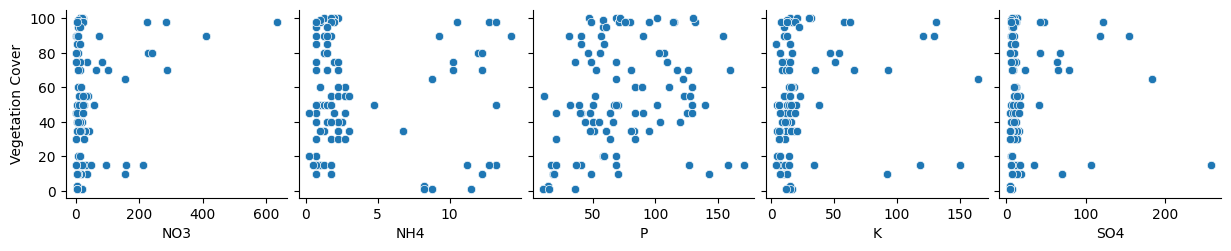

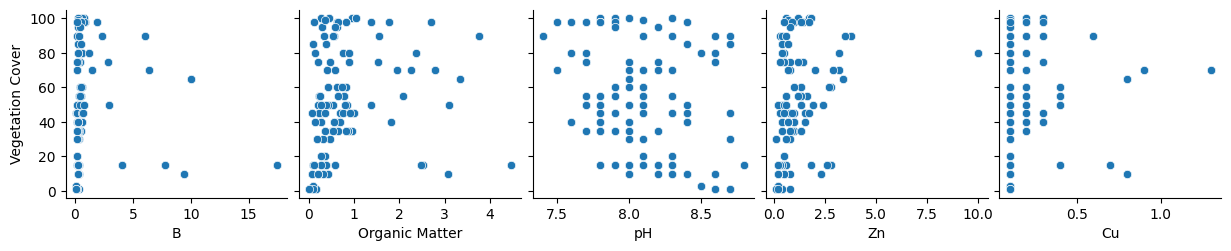

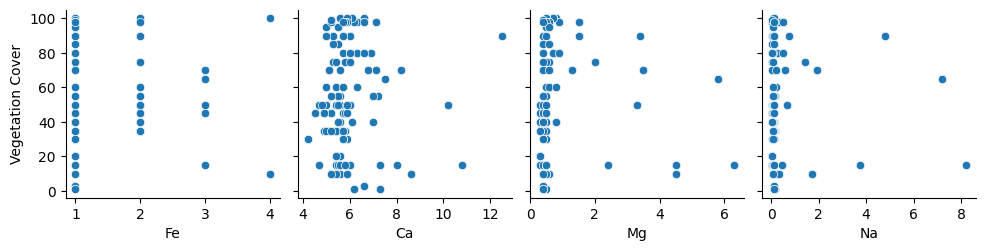

<Axes: >

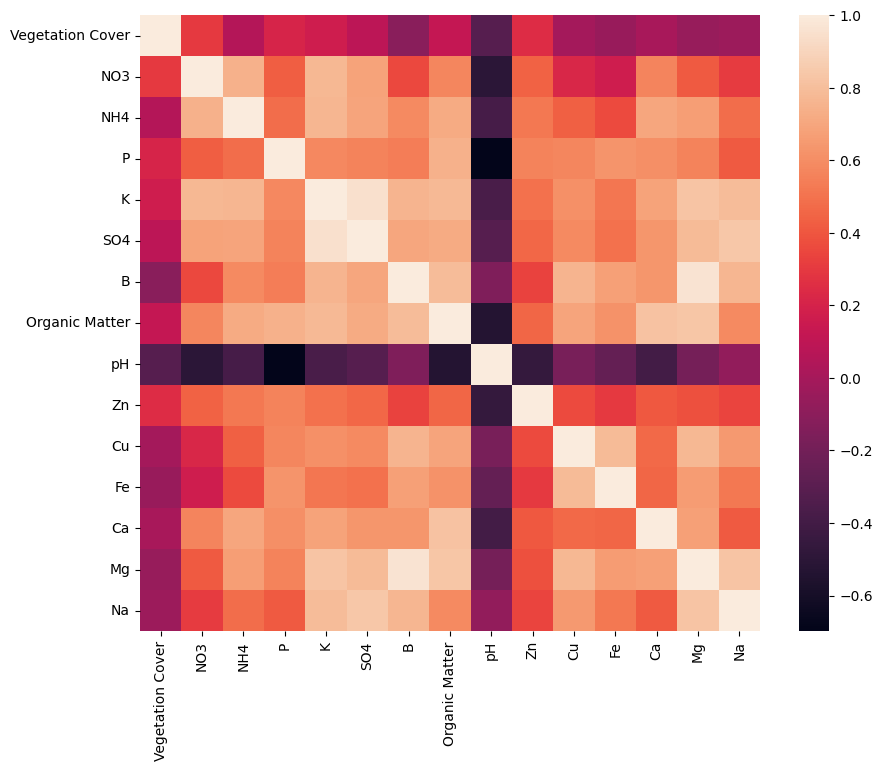

In [17]:
import seaborn as sns

#pair plots
pairplot1 = sns.pairplot(soil_data,x_vars=soil_data.columns[1:6],y_vars=['Vegetation Cover'])
plt.show()

pairplot2 = sns.pairplot(soil_data,x_vars=soil_data.columns[6:11],y_vars=['Vegetation Cover'])
plt.show()

pairplot3 = sns.pairplot(soil_data,x_vars=soil_data.columns[11:15],y_vars=['Vegetation Cover'])
plt.show()

# getting coeralation values
values = soil_data.corr()
# plotting values
plt.figure(figsize=(10,8))
sns.heatmap(values,annot=False)

### Summary ###

In [18]:
import pandas as pd
import numpy as np


X, Y = soil_data[soil_data.columns[1:]], soil_data['Vegetation Cover']


print(X[:10])
print(X)
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X, Y = scaler.fit_transform(X.values), scaler.fit_transform(Y.values.reshape(-1,1))
print(X[0])

     NO3   NH4      P     K   SO4     B  Organic Matter   pH   Zn   Cu   Fe  \
0  23.00  2.25  101.0  32.0  12.0  0.71            0.96  7.8  1.7  0.3  4.0   
1   6.00  0.75   58.0  10.0   7.0  0.27            0.30  8.2  0.8  0.1  1.0   
2   7.25  1.00  115.0   8.0  10.0  0.56            0.62  7.9  1.4  0.2  2.0   
3  21.00  1.25  130.0  30.0  13.0  0.78            1.04  7.9  1.8  0.3  2.0   
4   1.75  0.50   17.0   4.0   6.0  0.25            0.10  8.8  0.3  0.1  1.0   
5   2.00  0.75   40.0   8.0   6.0  0.24            0.22  8.3  0.9  0.1  1.0   
6   1.50  0.25   21.0  12.0   5.0  0.20            0.08  8.7  0.3  0.1  1.0   
7  14.75  0.75   53.0  12.0   8.0  0.18            0.41  8.3  0.8  0.1  1.0   
8  12.75  2.00   72.0  15.0  10.0  0.64            0.45  8.0  1.2  0.2  2.0   
9  18.50  1.75   47.0  21.0   7.0  0.29            0.28  8.3  0.6  0.1  1.0   

    Ca   Mg    Na  
0  6.6  0.8  0.12  
1  5.0  0.5  0.07  
2  5.2  0.4  0.04  
3  6.1  0.7  0.10  
4  4.7  0.5  0.10  
5  4.9  0.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import r2_score

def train(model, X, Y):
    model.fit(X,Y)
    return model

def print_metrics(model, X, Y):

    # Predicted test data
    y_pred = model.predict(X)

    # Mean Square Error
    mean_square_error = mean_squared_error(Y, y_pred)
    print('Mean Square Error : ', mean_square_error)

    # Root Mean Square Error
    root_mean_square_error = mean_square_error**0.5
    print('Root Mean Square Error : ', root_mean_square_error)

    # Mean Absolute Error
    mean_absolute_error_val = mean_absolute_error(Y, y_pred)
    print('Mean Absolute Error : ', mean_absolute_error_val)

    # R2 Score
    r2 = r2_score(Y, y_pred)
    print('R2 Score : ', r2)



In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=43)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
print(X_train)

[[1.         0.92857143 0.37888199 ... 0.34939759 0.2        0.05616606]
 [0.00670876 0.80357143 0.0310559  ... 0.24096386 0.01666667 0.01098901]
 [0.00907656 0.03571429 0.29813665 ... 0.09638554 0.03333333 0.004884  ]
 ...
 [0.04459353 0.46428571 0.52795031 ... 0.18072289 0.03333333 0.01098901]
 [0.02209945 0.         0.30434783 ... 0.14457831 0.         0.001221  ]
 [0.06156275 0.10714286 0.26086957 ... 0.15662651 0.03333333 0.00610501]]


#LINEAR REGRESSION


In [21]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

# training
linearModel = train(linearModel,X_train,Y_train)

#print metrics
print_metrics(linearModel, X_test, Y_test)
print(linearModel.score(X_train,Y_train))

with open('Linear Model','wb') as f:
  pickle.dump(linearModel,f)

Mean Square Error :  0.07114245006752426
Root Mean Square Error :  0.26672542073736477
Mean Absolute Error :  0.22613571082257708
R2 Score :  0.22934959943551392
0.4323372472849155


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

# Get the best model from the grid search
best_linear_model = grid_search.best_estimator_
y_pred_linear = best_linear_model.predict(X_test)
# Print the best hyperparameters
print("Best Hyperparameters for Linear Regression:", grid_search.best_params_)

# Now, evaluate the best model
print_metrics(best_linear_model, X_test, Y_test)
mse_linearmodel=mean_squared_error(Y_test, y_pred_linear)

Best Hyperparameters for Linear Regression: {'fit_intercept': True}
Mean Square Error :  0.07114245006752426
Root Mean Square Error :  0.26672542073736477
Mean Absolute Error :  0.22613571082257708
R2 Score :  0.22934959943551392


###COMPARISON OF MSE (LR before VS LR after tuning)

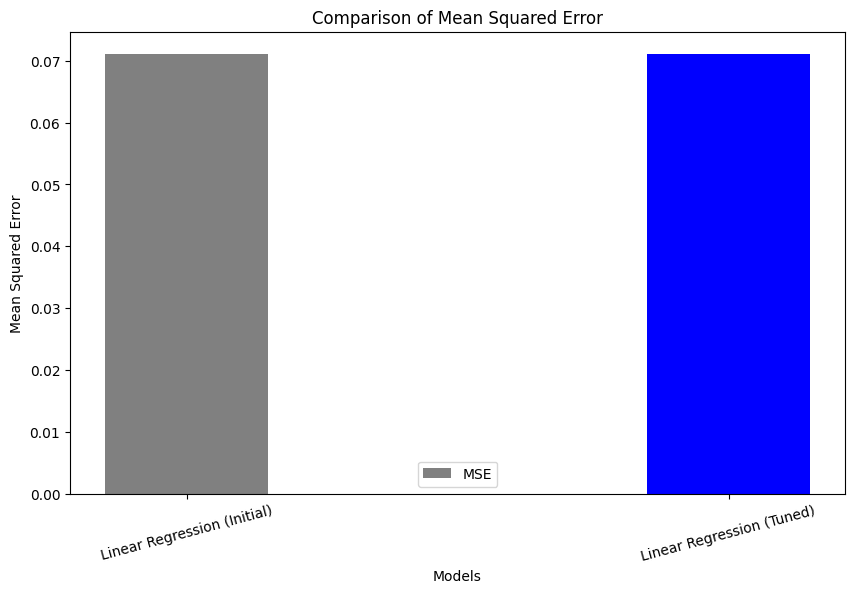

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predictions from the best Linear Regression model
y_pred_linear = best_linear_model.predict(X_test)

# Calculate Mean Squared Error for the tuned Linear Regression model
mse_linear_tuned = mean_squared_error(Y_test, y_pred_linear)

# Calculate initial Mean Squared Error (before hyperparameter tuning) for Linear Regression
y_pred_linear_initial = linearModel.predict(X_test)
mse_linear_initial = mean_squared_error(Y_test, y_pred_linear_initial)

# Create a grouped bar chart to compare Mean Squared Errors
models = ['Linear Regression (Initial)', 'Linear Regression (Tuned)']
mse_values = [mse_linear_initial, mse_linear_tuned]

# Set up positions for the bars
x = np.arange(len(models))
width = 0.3

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, width, label='MSE', color=['gray', 'blue'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.xticks(x, models, rotation=15)
plt.legend()
plt.show()


#KNN

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Create a K-NN regression model
knn_regression_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K)

# Train the model on the training data
knn_regression_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_knn = knn_regression_model.predict(X_test)

# Evaluate the model
r2_knn = r2_score(Y_test, y_pred_knn)
#print("Mean Squared Error (K-NN):", mse_knn)
#print("R-squared (R2) Score (K-NN):", r2_knn)
print_metrics(knn_regression_model, X_test, Y_test)


Mean Square Error :  0.033349807510930946
Root Mean Square Error :  0.18261929665544915
Mean Absolute Error :  0.13540280857354028
R2 Score :  0.6387382991075862


In [26]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method
    'p': [1, 2]  # Power parameter (1 for Manhattan distance, 2 for Euclidean distance)
}
grid_search_knn = GridSearchCV(knn_regression_model, param_grid_knn, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to your data
grid_search_knn.fit(X_train, Y_train)

# Get the best hyperparameters for K-NN
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for K-NN:", best_params_knn)

# Use the best K-NN model for predictions
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn=best_knn_model.predict(X_test)
mse_knn = mean_squared_error(Y_test, y_pred_knn)

print_metrics(best_knn_model, X_test, Y_test)

Best Hyperparameters for K-NN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Mean Square Error :  0.0001714398596248408
Root Mean Square Error :  0.013093504482178971
Mean Absolute Error :  0.0033527007917379475
R2 Score :  0.9981428781779766


###COMPARISON OF MSE (KNN before VS KNN after tuning)

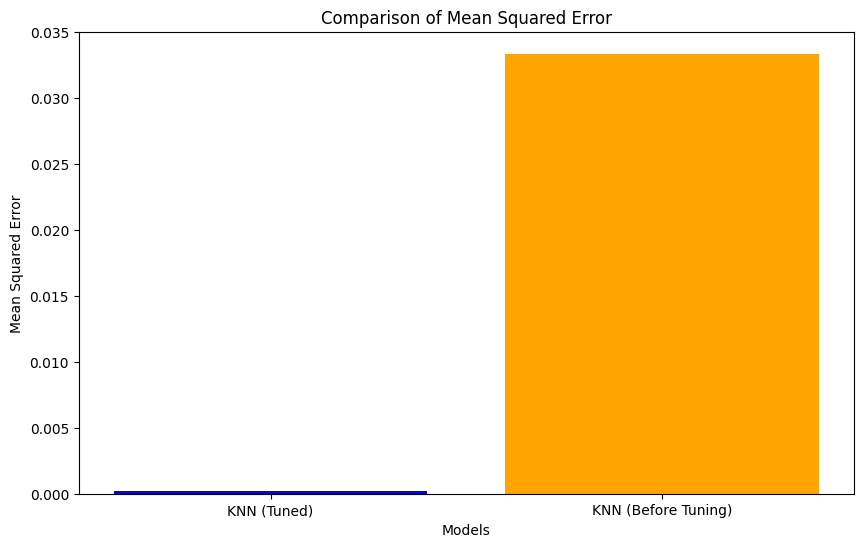

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predictions from the best K-NN model (after tuning)
y_pred_knn_tuned = best_knn_model.predict(X_test)

# Calculate Mean Squared Error for the best K-NN model (after tuning)
mse_knn_tuned = mean_squared_error(Y_test, y_pred_knn_tuned)

# Predictions from the K-NN model (before tuning)
y_pred_knn_before_tuning = knn_regression_model.predict(X_test)

# Calculate Mean Squared Error for the K-NN model (before tuning)
mse_knn_before_tuning = mean_squared_error(Y_test, y_pred_knn_before_tuning)

# Create a bar chart to compare Mean Squared Errors
models = ['KNN (Tuned)', 'KNN (Before Tuning)']
mse_values = [mse_knn_tuned, mse_knn_before_tuning]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()


#SIMPLE ENSEMBLE METHODS


In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regressor as the base model
base_regression_model = DecisionTreeRegressor()

# Create a BaggingRegressor with the base model
ensemble_regression_model = BaggingRegressor(base_regression_model, n_estimators=100, random_state=42)

# Train the ensemble model on the training data
ensemble_regression_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_ensemble = ensemble_regression_model.predict(X_test)

# Evaluate the ensemble model
#mse_ensemble = mean_squared_error(Y_test, y_pred_ensemble)
r2_ensemble = r2_score(Y_test, y_pred_ensemble)
#print("Mean Squared Error (Ensemble):", mse_ensemble)
#print("R-squared (R2) Score (Ensemble):", r2_ensemble)
print_metrics(ensemble_regression_model,X_test,Y_test)


Mean Square Error :  0.004113065988786625
Root Mean Square Error :  0.06413318944810577
Mean Absolute Error :  0.04059004680955925
R2 Score :  0.9554452236491989


In [29]:
# Define a hyperparameter grid for BaggingRegressor
param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],  # Fraction of samples used for fitting base estimator
    'max_features': [0.5, 0.7, 1.0],  # Fraction of features used for fitting base estimator
}

# Create a GridSearchCV object for BaggingRegressor
grid_search_bagging = GridSearchCV(ensemble_regression_model, param_grid_bagging, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to your data
grid_search_bagging.fit(X_train, Y_train)

# Get the best hyperparameters for BaggingRegressor
best_params_bagging = grid_search_bagging.best_params_
print("Best Hyperparameters for BaggingRegressor:", best_params_bagging)

# Use the best BaggingRegressor model for predictions
best_bagging_model = grid_search_bagging.best_estimator_
y_pred_bagging = best_bagging_model.predict(X_test)
mse_ensemble = mean_squared_error(Y_test, y_pred_bagging)
print_metrics(ensemble_regression_model,X_test,Y_test)


Best Hyperparameters for BaggingRegressor: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 200}
Mean Square Error :  0.004113065988786625
Root Mean Square Error :  0.06413318944810577
Mean Absolute Error :  0.04059004680955925
R2 Score :  0.9554452236491989


###COMPARISON OF MSE (Bagging Regressor before VS Bagging Regressor after tuning)

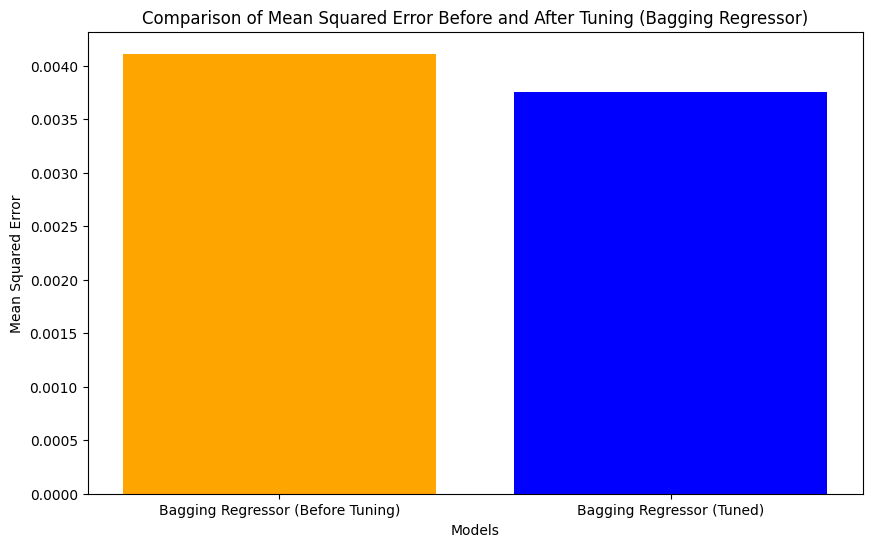

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predictions from the best Bagging Regressor model (after tuning)
y_pred_bagging_tuned = best_bagging_model.predict(X_test)

# Calculate Mean Squared Error for the best Bagging Regressor model (after tuning)
mse_bagging_tuned = mean_squared_error(Y_test, y_pred_bagging_tuned)

# Predictions from the Bagging Regressor model (before tuning)
y_pred_bagging_before_tuning = ensemble_regression_model.predict(X_test)

# Calculate Mean Squared Error for the Bagging Regressor model (before tuning)
mse_bagging_before_tuning = mean_squared_error(Y_test, y_pred_bagging_before_tuning)

# Create a bar chart to compare Mean Squared Errors
models = ['Bagging Regressor (Before Tuning)', 'Bagging Regressor (Tuned)']
mse_values = [mse_bagging_before_tuning, mse_bagging_tuned]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['orange', 'blue'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error Before and After Tuning (Bagging Regressor)')
plt.show()


#GRADIENT BOOSTING

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor with your desired hyperparameters
gradient_boosting_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=0)

# Fit the model to the training data
gradient_boosting_model.fit(X_train, Y_train)
y_pred_grad=gradient_boosting_model.predict(X_test)
# Evaluate the model
print_metrics(gradient_boosting_model, X_test, Y_test)
mse_gradient=mean_squared_error(Y_test,y_pred_grad)

Mean Square Error :  0.00040045655077573203
Root Mean Square Error :  0.02001141051439733
Mean Absolute Error :  0.005376939468637157
R2 Score :  0.9956620554820494


###COMPARISON OF MSE (Gradient Boosting before VS Gradient Boosting after tuning)

Initial Gradient Boosting Model Metrics:
Mean Square Error :  0.0038186522903409454
Root Mean Square Error :  0.06179524488454549
Mean Absolute Error :  0.045377623404344127
R2 Score :  0.9586344592521826
Tuned Gradient Boosting Model Metrics:
Mean Square Error :  0.00040045655077573203
Root Mean Square Error :  0.02001141051439733
Mean Absolute Error :  0.005376939468637157
R2 Score :  0.9956620554820494


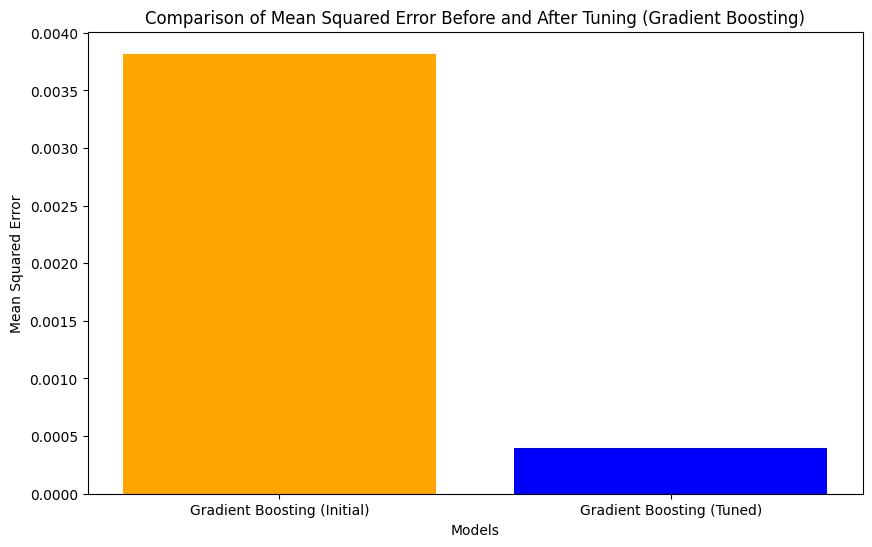

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor with initial hyperparameters
initial_gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Fit the initial model to the training data
initial_gradient_boosting_model.fit(X_train, Y_train)

# Make predictions with the initial model
y_pred_initial = initial_gradient_boosting_model.predict(X_test)

# Evaluate the initial model
print("Initial Gradient Boosting Model Metrics:")
print_metrics(initial_gradient_boosting_model, X_test, Y_test)
mse_initial = mean_squared_error(Y_test, y_pred_initial)

# Create a GradientBoostingRegressor with tuned hyperparameters
tuned_gradient_boosting_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=0)

# Fit the tuned model to the training data
tuned_gradient_boosting_model.fit(X_train, Y_train)

# Make predictions with the tuned model
y_pred_tuned = tuned_gradient_boosting_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Gradient Boosting Model Metrics:")
print_metrics(tuned_gradient_boosting_model, X_test, Y_test)
mse_tuned = mean_squared_error(Y_test, y_pred_tuned)

# Compare MSE values before and after tuning
models = ['Gradient Boosting (Initial)', 'Gradient Boosting (Tuned)']
mse_values = [mse_initial, mse_tuned]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['orange', 'blue'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error Before and After Tuning (Gradient Boosting)')
plt.show()

#RANDOM FOREST




In [33]:
from sklearn.ensemble import RandomForestRegressor

forestRegressor = RandomForestRegressor(criterion='friedman_mse', max_depth=20, n_estimators=17, random_state=0)

#training reshaping y_train because of warning
Y_train.reshape

forestRegressor = forestRegressor.fit(X_train, Y_train)
#print metrics
print_metrics(forestRegressor, X_test, Y_test)

with open('Random Forest Regression','wb') as f:
  pickle.dump(forestRegressor,f)


Mean Square Error :  0.005245024997363137
Root Mean Square Error :  0.07242254481418847
Mean Absolute Error :  0.04158514847180562
R2 Score :  0.9431832807086046


In [34]:
# Define hyperparameter grid for Random Forest Regression
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [4, 9, 16],
    'min_samples_split': [2, 6, 10]
}

# Create a GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
# Fit the grid search to your training data
rf_grid_search.fit(X_train, Y_train)

# Get the best Random Forest model from the grid search
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf=best_rf_model.predict(X_test)
mse_random=mean_squared_error(Y_test,y_pred_rf)
# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)

# Now, evaluate the best model
print_metrics(best_rf_model, X_test, Y_test)


Best Hyperparameters for Random Forest: {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 100}
Mean Square Error :  0.0035272264201227995
Root Mean Square Error :  0.0593904573153196
Mean Absolute Error :  0.037637364893462665
R2 Score :  0.9617913292138623


###COMPARISON OF MSE(RF before VS RF after tuning)

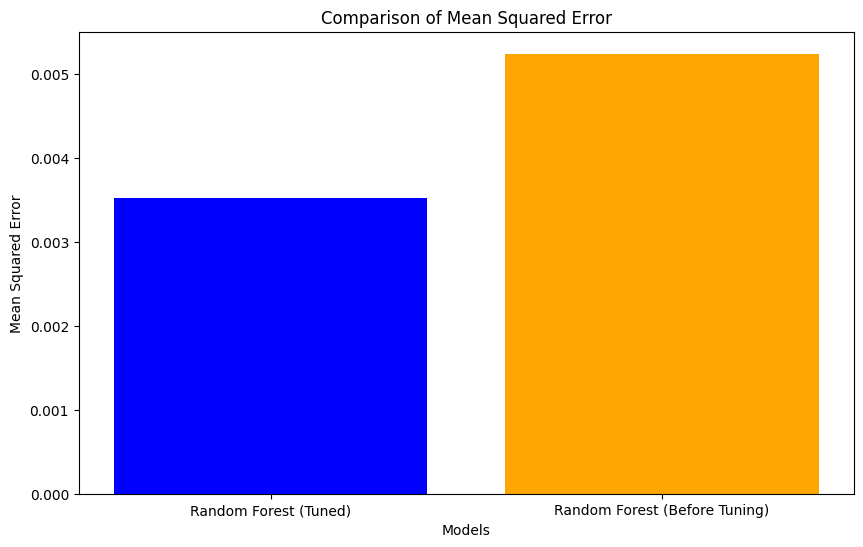

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predictions from the best Random Forest model (after tuning)
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Calculate Mean Squared Error for the best Random Forest model (after tuning)
mse_rf_tuned = mean_squared_error(Y_test, y_pred_rf_tuned)

# Predictions from the Random Forest model (before tuning)
y_pred_rf = forestRegressor.predict(X_test)

# Calculate Mean Squared Error for the Random Forest model (before tuning)
mse_rf = mean_squared_error(Y_test, y_pred_rf)

# Create a bar chart to compare Mean Squared Errors
models = ['Random Forest (Tuned)', 'Random Forest (Before Tuning)']
mse_values = [mse_rf_tuned, mse_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()


#DECISON TREE

In [36]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=5)

#training
treeRegressor = treeRegressor.fit(X_train, Y_train)

#print metrics
print_metrics(treeRegressor, X_test, Y_test)
#print(export_graphviz(treeRegressor))
with open('Decision Tree Regression','wb') as f:
  pickle.dump(treeRegressor,f)

Mean Square Error :  0.020754687709667513
Root Mean Square Error :  0.14406487326780082
Mean Absolute Error :  0.09948465169782783
R2 Score :  0.7751749007538405


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Decision Tree Regression
param_grid = {
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error'],  # Criterion to evaluate splits
    'max_depth': [None, 10, 20, 30],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]               # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object for Decision Tree Regression
tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
tree_grid_search.fit(X_train, Y_train)

# Get the best Decision Tree model from the grid search
best_tree_model = tree_grid_search.best_estimator_
y_pred_dt=best_tree_model.predict(X_test)
mse_decision=mean_squared_error(Y_test,y_pred_dt)
# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree Regression:", tree_grid_search.best_params_)

# Now, evaluate the best model
print_metrics(best_tree_model, X_test, Y_test)


Best Hyperparameters for Decision Tree Regression: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Square Error :  0.002174678542010399
Root Mean Square Error :  0.04663344874669253
Mean Absolute Error :  0.016814486326681453
R2 Score :  0.976442800495223


###COMPARISON OF MSE (DT before VS DT after tuning)

Initial Decision Tree Model Metrics:
Mean Square Error :  0.020754687709667506
Root Mean Square Error :  0.1440648732678008
Mean Absolute Error :  0.09948465169782778
R2 Score :  0.7751749007538407
Tuned Decision Tree Model Metrics:
Mean Square Error :  0.002174678542010399
Root Mean Square Error :  0.04663344874669253
Mean Absolute Error :  0.016814486326681453
R2 Score :  0.976442800495223


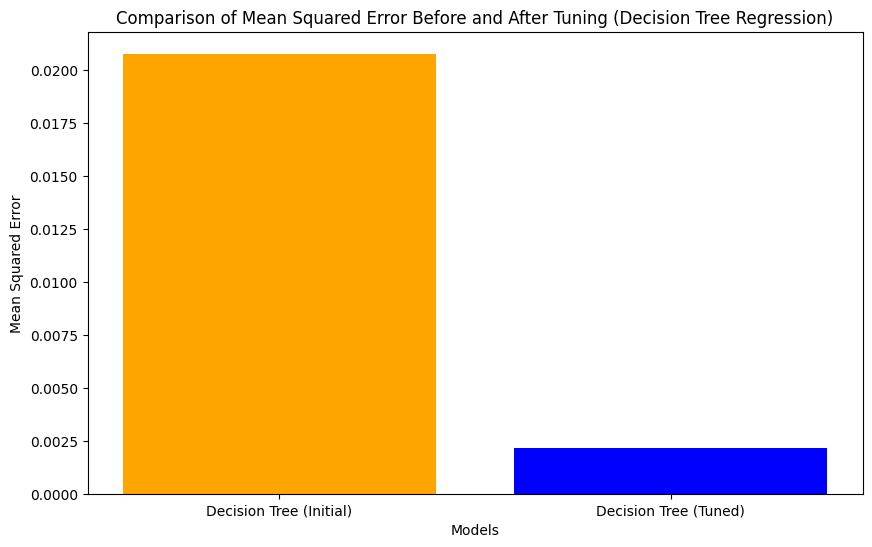

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeRegressor with initial hyperparameters
initial_tree_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=5, random_state=0)

# Fit the initial model to the training data
initial_tree_model.fit(X_train, Y_train)

# Make predictions with the initial model
y_pred_initial_tree = initial_tree_model.predict(X_test)

# Evaluate the initial model
print("Initial Decision Tree Model Metrics:")
print_metrics(initial_tree_model, X_test, Y_test)
mse_initial_tree = mean_squared_error(Y_test, y_pred_initial_tree)

# Define a hyperparameter grid for Decision Tree Regression
param_grid = {
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree Regression
tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
tree_grid_search.fit(X_train, Y_train)

# Get the best Decision Tree model from the grid search
best_tree_model = tree_grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_tuned_tree = best_tree_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Decision Tree Model Metrics:")
print_metrics(best_tree_model, X_test, Y_test)
mse_tuned_tree = mean_squared_error(Y_test, y_pred_tuned_tree)

# Compare MSE values before and after tuning
models = ['Decision Tree (Initial)', 'Decision Tree (Tuned)']
mse_values = [mse_initial_tree, mse_tuned_tree]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['orange', 'blue'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error Before and After Tuning (Decision Tree Regression)')
plt.show()


#COMPARISON OF ALL MODELS

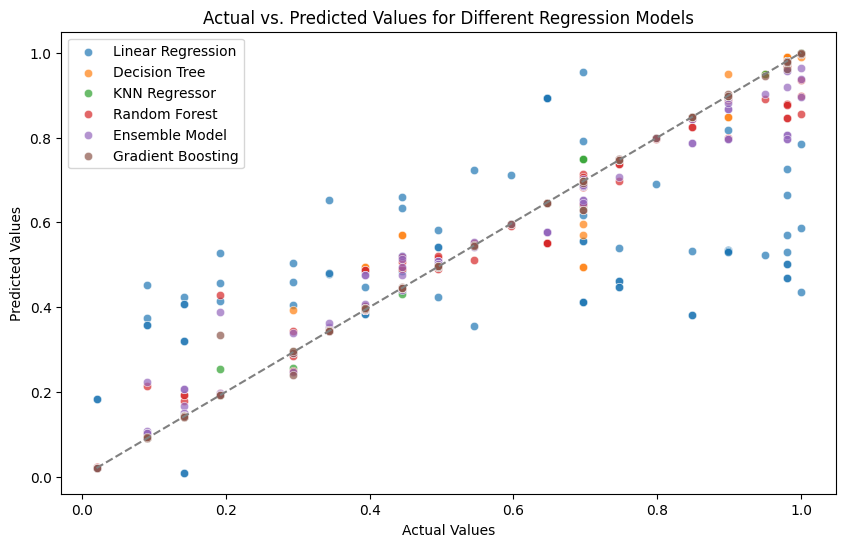

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual values (ground truth)
actual_values = Y_test  # Replace with your actual test data

# Predicted values from different regression models
predicted_linear_regression = best_linear_model.predict(X_test)
predicted_decision_tree = best_tree_model.predict(X_test)
predicted_knn = best_knn_model.predict(X_test)
predicted_random_forest = best_rf_model.predict(X_test)
predicted_ensemble = best_bagging_model.predict(X_test)
predicted_gradient_boosting = gradient_boosting_model.predict(X_test)

# Create a scatterplot for actual vs. predicted values for each model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_values, y=predicted_linear_regression, label='Linear Regression', alpha=0.7)
sns.scatterplot(x=actual_values, y=predicted_decision_tree, label='Decision Tree', alpha=0.7)
sns.scatterplot(x=actual_values, y=predicted_knn, label='KNN Regressor', alpha=0.7)
sns.scatterplot(x=actual_values, y=predicted_random_forest, label='Random Forest', alpha=0.7)
sns.scatterplot(x=actual_values, y=predicted_ensemble, label='Ensemble Model', alpha=0.7)
sns.scatterplot(x=actual_values, y=predicted_gradient_boosting, label='Gradient Boosting', alpha=0.7)

# Add a diagonal line (y = x) for reference
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], '--', color='gray')

# Set labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Different Regression Models")

# Show legend
plt.legend()

# Show the plot
plt.show()


##COMPARISON OF MSE OF ALL MODELS BEFORE FINE TUNING

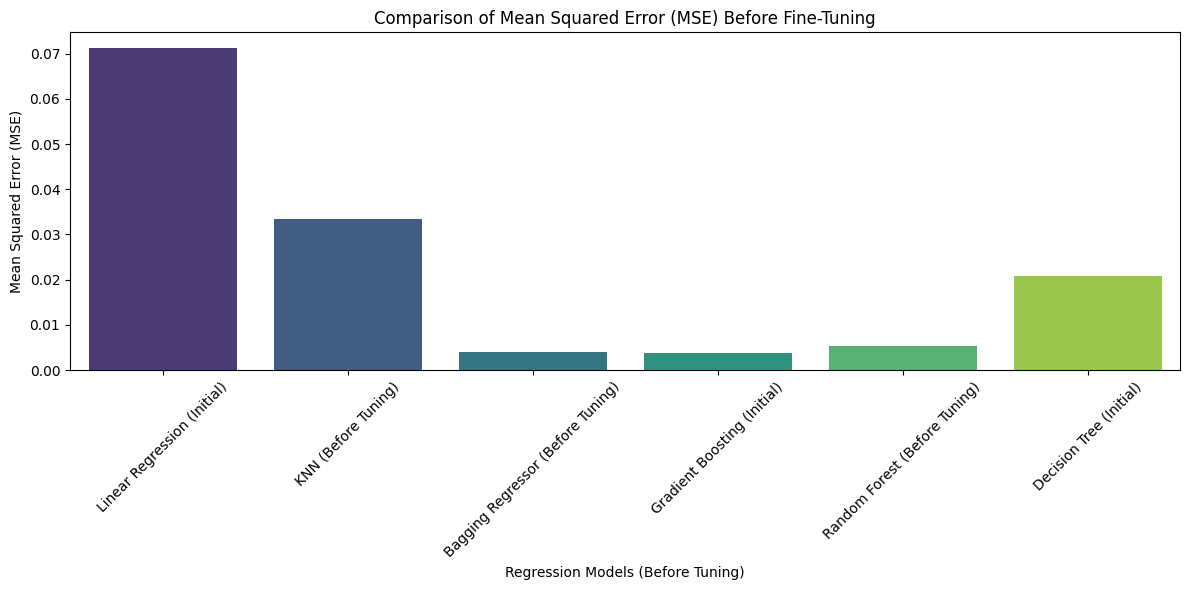

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names
model_names = [
    'Linear Regression (Initial)',
    'KNN (Before Tuning)',
    'Bagging Regressor (Before Tuning)',
    'Gradient Boosting (Initial)',
    'Random Forest (Before Tuning)',
    'Decision Tree (Initial)'
]

# Corresponding MSE values for each model before fine-tuning
mse_values_before_tuning = [
    mse_linear_initial,
    mse_knn_before_tuning,
    mse_bagging_before_tuning,
    mse_initial,
    mse_rf,
    mse_initial_tree
]

# Create a bar plot for MSE comparison before fine-tuning
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=mse_values_before_tuning, palette='viridis')
plt.xlabel("Regression Models (Before Tuning)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Mean Squared Error (MSE) Before Fine-Tuning")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##COMPARISON OF MSE OF ALL MODELS AFTER FINE TUNING

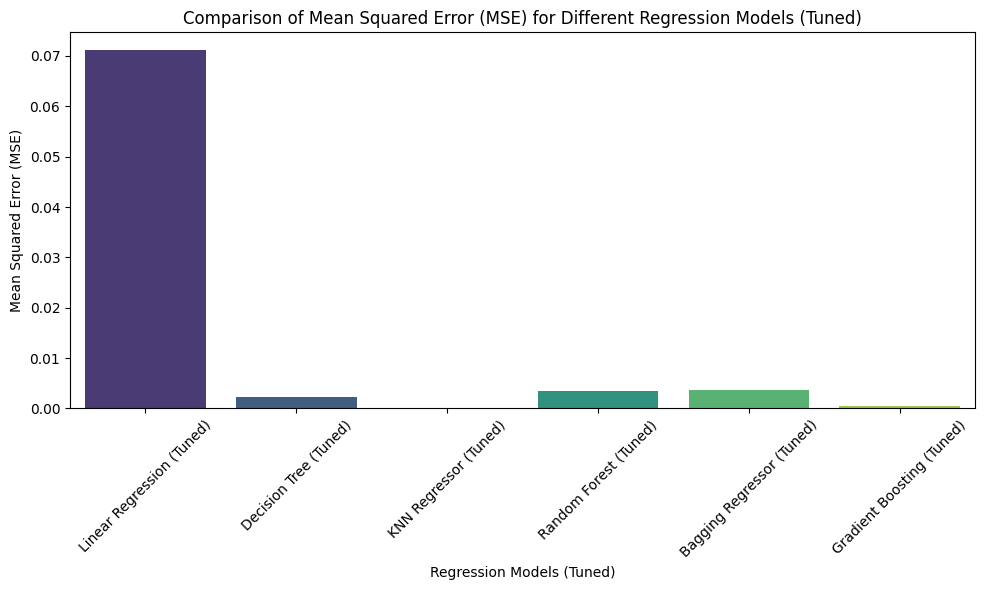

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names after tuning
model_names = [
    'Linear Regression (Tuned)',
    'Decision Tree (Tuned)',
    'KNN Regressor (Tuned)',
    'Random Forest (Tuned)',
    'Bagging Regressor (Tuned)',
    'Gradient Boosting (Tuned)'
]

# Corresponding MSE values for each model after tuning
mse_values_tuned = [
    mse_linear_tuned,
    mse_tuned_tree,  # Assuming this is the tuned Decision Tree model
    mse_knn_tuned,
    mse_rf_tuned,  # Assuming this is the tuned Random Forest model
    mse_bagging_tuned,  # Assuming this is the tuned Bagging Regressor model
    mse_tuned  # Assuming this is the tuned Gradient Boosting model
]

# Create a bar plot for MSE comparison after tuning
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_values_tuned, palette='viridis')
plt.xlabel("Regression Models (Tuned)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Mean Squared Error (MSE) for Different Regression Models (Tuned)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##DONE!